In [18]:
import sys
import pandas as pd
import numpy as np

sys.path.append('/opt/hydra/')

import library.analysis as hydra

In [19]:
exp_path = '../data/TH-EMBRYONAL-log2TPM1.tsv'
mm_path = '../data/hydra-embryonal/MultiModalGenes'

In [20]:
exp = pd.read_csv(exp_path, sep='\t', index_col=0)

In [21]:
exp.shape

(16431, 50)

In [22]:
if False:
    scan = hydra.ScanEnrichmentAnalysis(mm_path, 
                                        exp_path, 
                                        'GO',
                                         min_prob_range=np.linspace(0.1, 0.4, 20)).scan()

In [23]:
scan

,num_genesets,gs_terms,gs_term_genes,num_genes,num_clusters,num_samples
min_prob_filter,,,,,,
0.100000,2,"complement activation, classical pathway|plasm...",IGHV4-4|IGHV3-15|IGHV1-18|IGHV3-11|IGHV5-51|IG...,31,2,50
0.115789,2,"complement activation, classical pathway|plasm...",IGHV4-4|IGHV3-15|IGHV1-18|IGKV1-16|IGHV5-51|IG...,31,2,50
0.131579,3,"complement activation, classical pathway|plasm...",IGHV4-4|IGHV3-15|IGHV1-18|IGHV3-11|IGHV5-51|FA...,38,2,50
0.147368,3,"complement activation, classical pathway|plasm...",IGHV4-4|IGHV3-15|IGHV1-18|IGHV3-11|IGHV5-51|HO...,35,2,50
0.163158,4,"complement activation, classical pathway|plasm...",IGHV4-4|IGHV3-15|IGHV1-18|IGKV1-16|IGKV1-17|IG...,41,2,50
0.178947,3,"complement activation, classical pathway|plasm...",IGHV4-4|IGHV3-15|IGHV1-18|IGKV1-16|IGKV1-17|IG...,34,2,50
0.194737,2,"complement activation, classical pathway|plasm...",IGHV4-4|IGHV3-15|IGHV1-18|IGKV1-16|IGKV1-17|IG...,29,2,50
0.210526,2,"complement activation, classical pathway|plasm...",IGHV4-4|IGHV3-15|IGHV1-18|IGKV1-16|IGKV1-17|IG...,28,2,50
0.226316,2,"complement activation, classical pathway|plasm...",IGHV4-4|IGHV3-15|IGHV1-18|IGKV1-16|IGKV1-17|IG...,28,2,50


In [24]:
en = hydra.EnrichmentAnalysis(exp_path=exp_path,
                              mm_path=mm_path,
                              gmt_path='GO',
                              min_prob_filter=0.35)

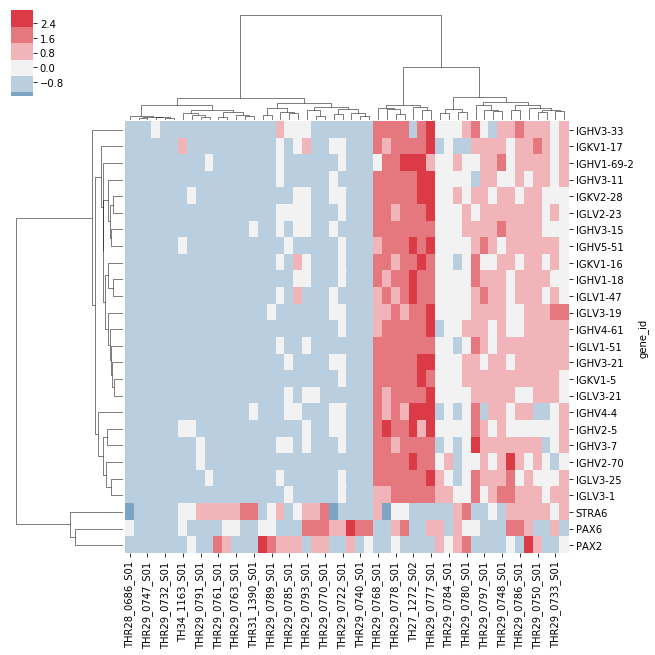

In [25]:
hclust = hydra.HClust(exp.reindex(en.get_enriched_term_genes()))
hclust.plot()

In [26]:
clust = hydra.MultivariateMixtureModel(data=exp.reindex(en.get_enriched_term_genes()),
                                       center=True,
                                       gamma=5.0,
                                       variance=2.0,
                                       K=1)

In [27]:
assignments = clust.get_assignments(exp.reindex(en.get_enriched_term_genes()))

assign = pd.DataFrame(index=exp.columns,
                      columns=[1])

for sample, assignment in zip(exp.columns, assignments):
    assign.loc[sample, 1] = assignment + 1

In [28]:
fgsea = clust.get_cluster_features(exp=exp,
                                  gmt='/opt/hydra/gene-sets/Human_GOBP_AllPathways_no_GO_iea_December_01_2018_symbol.gmt')

In [29]:
def format_pathway(x):
    fields = x.split('%')
    return '%s (%s)' % (fields[0], fields[1])

In [30]:
pth = '../img/TH-Embryonal-top-10-pathways-cluster-%d.tex'
for key, values in fgsea.items():
    with pd.option_context('display.precision', 2):
        t = values.reset_index().reindex(['pathway', 'padj', 'NES'], axis=1)
        t['pathway'] = t['pathway'].apply(format_pathway)
        with open(pth % key, 'w') as f:
            print(t[(t['NES'] > 0) & (t['padj'] < 0.05)].sort_values('NES', ascending=False).head(10).to_latex(index=False))
            t[(t['NES'] > 0) & (t['padj'] < 0.05)].sort_values('NES', ascending=False).head(10).to_latex(f, index=False)

\begin{tabular}{lrr}
\toprule
                                           pathway &      padj &   NES \\
\midrule
 EUKARYOTIC TRANSLATION ELONGATION (REACTOME DA... &  8.59e-03 &  5.27 \\
 PEPTIDE CHAIN ELONGATION (REACTOME DATABASE ID... &  8.38e-03 &  5.24 \\
                 VIRAL MRNA TRANSLATION (REACTOME) &  8.38e-03 &  5.14 \\
 FORMATION OF A POOL OF FREE 40S SUBUNITS (REAC... &  9.25e-03 &  5.12 \\
     EUKARYOTIC TRANSLATION TERMINATION (REACTOME) &  8.59e-03 &  5.11 \\
 CYTOPLASMIC RIBOSOMAL PROTEINS (WIKIPATHWAYS\_2... &  8.27e-03 &  5.07 \\
 NONSENSE MEDIATED DECAY (NMD) INDEPENDENT OF T... &  8.82e-03 &  5.03 \\
 SRP-DEPENDENT COTRANSLATIONAL PROTEIN TARGETIN... &  8.60e-03 &  4.97 \\
               SELENOCYSTEINE SYNTHESIS (REACTOME) &  8.60e-03 &  4.87 \\
 L13A-MEDIATED TRANSLATIONAL SILENCING OF CERUL... &  9.86e-03 &  4.87 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
                                           pathway &      padj &   NES \\
\midrule
    HA

In [31]:
fgsea_df = None
for key, values in fgsea.items():
    if fgsea_df is None:
        header = pd.MultiIndex.from_product([list(fgsea.keys()), 
                                             ['padj', 'NES']],
                                           names=['cluster', 'feature'])
        
        fgsea_df = pd.DataFrame(index=values.index.values, columns=header)
        
    print 'Key: ', key,
    t = values.reset_index().reindex(['pathway', 'padj', 'NES'], axis=1)
    t['pathway'] = t['pathway'].apply(format_pathway) 
    print(t[(t['NES'] > 0) & (t['padj'] < 0.05)].sort_values('NES', ascending=False).head(10))
    
    fgsea_df[(key, 'padj')] = values.loc[fgsea_df.index, 'padj'].values
    fgsea_df[(key, 'NES')] = values.loc[fgsea_df.index, 'NES'].values

Key:  0                                              pathway      padj       NES
0  EUKARYOTIC TRANSLATION ELONGATION (REACTOME DA...  0.008587  5.268511
1  PEPTIDE CHAIN ELONGATION (REACTOME DATABASE ID...  0.008379  5.244760
2                  VIRAL MRNA TRANSLATION (REACTOME)  0.008379  5.136096
3  FORMATION OF A POOL OF FREE 40S SUBUNITS (REAC...  0.009247  5.122051
4      EUKARYOTIC TRANSLATION TERMINATION (REACTOME)  0.008587  5.109261
5  CYTOPLASMIC RIBOSOMAL PROTEINS (WIKIPATHWAYS_2...  0.008266  5.072913
6  NONSENSE MEDIATED DECAY (NMD) INDEPENDENT OF T...  0.008821  5.027313
7  SRP-DEPENDENT COTRANSLATIONAL PROTEIN TARGETIN...  0.008599  4.971792
8                SELENOCYSTEINE SYNTHESIS (REACTOME)  0.008599  4.869090
9  L13A-MEDIATED TRANSLATIONAL SILENCING OF CERUL...  0.009859  4.867422
Key:  1                                              pathway      padj       NES
0     HALLMARK_INTERFERON_GAMMA_RESPONSE (MSIGDB_C2)  0.001753  4.050478
1     HALLMARK_INTERFERON_ALPHA_RES

In [32]:
pth = '../data/TH-eRMS-Pathways-Enrichment.tsv'
fgsea_df.to_csv(pth, sep='\t')

In [12]:
feat[0]

,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
pathway,,,,,,,
PEPTIDE CHAIN ELONGATION%REACTOME DATABASE ID RELEASE 66%156902,0.000796,0.009175,0.721305,5.317624,0,87,RPL23|RPS3|RPL37A|RPS13|RPL38|RPS25|RPL36A|RPL...
EUKARYOTIC TRANSLATION ELONGATION%REACTOME DATABASE ID RELEASE 66%156842,0.000822,0.009386,0.715229,5.297705,0,91,EEF1G|RPL23|RPS3|RPL37A|RPS13|RPL38|RPS25|RPL3...
VIRAL MRNA TRANSLATION%REACTOME%R-HSA-192823.3,0.000796,0.009175,0.706361,5.207450,0,87,RPL23|RPS3|RPL37A|RPS13|RPL38|RPS25|RPL36A|RPL...
FORMATION OF A POOL OF FREE 40S SUBUNITS%REACTOME DATABASE ID RELEASE 66%72689,0.000938,0.010315,0.678898,5.182791,0,99,RPL23|RPS3|RPL37A|RPS13|RPL38|RPS25|RPL36A|RPL...
CYTOPLASMIC RIBOSOMAL PROTEINS%WIKIPATHWAYS_20181110%WP477%HOMO SAPIENS,0.000794,0.009175,0.699361,5.141929,0,86,RPL23|RPS3|RPL37A|RPS13|RPL38|RPS25|RPL36A|RPL...
EUKARYOTIC TRANSLATION TERMINATION%REACTOME%R-HSA-72764.4,0.000822,0.009386,0.693610,5.137573,0,91,RPL23|RPS3|RPL37A|RPS13|RPL38|RPS25|RPL36A|RPL...
NONSENSE MEDIATED DECAY (NMD) INDEPENDENT OF THE EXON JUNCTION COMPLEX (EJC)%REACTOME DATABASE ID RELEASE 66%975956,0.000850,0.009605,0.679944,5.076880,0,93,RPL23|RPS3|RPL37A|RPS13|RPL38|RPS25|RPL36A|RPL...
SRP-DEPENDENT COTRANSLATIONAL PROTEIN TARGETING TO MEMBRANE%GOBP%GO:0006614,0.000819,0.009363,0.678022,5.023873,0,90,RPL23|RPS3|RPL37A|RPS13|RPL38|RPS25|RPL36A|RPL...
SELENOCYSTEINE SYNTHESIS%REACTOME%R-HSA-2408557.2,0.000819,0.009363,0.664017,4.920096,0,90,RPL23|RPS3|RPL37A|RPS13|RPL38|RPS25|RPL36A|RPL...


In [13]:
feat[1]

,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
pathway,,,,,,,
HALLMARK_INTERFERON_GAMMA_RESPONSE%MSIGDB_C2%HALLMARK_INTERFERON_GAMMA_RESPONSE,0.000069,0.001662,0.704192,4.064360,0,185,IL2RB|APOL6|CASP8|CSF2RB|SLAMF7|IRF1|IL10RA|SA...
HALLMARK_INTERFERON_ALPHA_RESPONSE%MSIGDB_C2%HALLMARK_INTERFERON_ALPHA_RESPONSE,0.000073,0.001662,0.739134,3.883194,0,94,CASP8|IRF1|SAMD9L|GBP4|SAMD9|SELL|B2M|PSMB9|HL...
IMMUNOREGULATORY INTERACTIONS BETWEEN A LYMPHOID AND A NON-LYMPHOID CELL%REACTOME DATABASE ID RELEASE 66%198933,0.000075,0.001662,0.757847,3.777330,0,70,IGKV4-1|IGKV2-28|IGKV3-11|ITGAL|SLAMF7|IGKV2D-...
INNATE IMMUNE RESPONSE%GOBP%GO:0045087,0.000068,0.001662,0.628027,3.732436,0,250,IGHV3-15|IGHV3-73|IGHV5-51|IGHV1-18|IGHV3-21|I...
INTERFERON-GAMMA-MEDIATED SIGNALING PATHWAY%GOBP%GO:0060333,0.000076,0.001662,0.763982,3.721135,0,62,IRF1|CIITA|B2M|HLA-A|TRIM38|OAS2|HLA-E|HLA-DRA...
IMMUNE RESPONSE-ACTIVATING SIGNAL TRANSDUCTION%GOBP%GO:0002757,0.000067,0.001662,0.616458,3.687387,0,269,IGHV3-15|IGHV3-73|IGHV5-51|IGHV1-18|IGKV4-1|IG...
CELLULAR RESPONSE TO TYPE I INTERFERON%GOBP%GO:0071357,0.000078,0.001662,0.802193,3.683057,0,47,IRF1|HLA-A|OAS2|HLA-E|HLA-C|HLA-B|PSMB8|HLA-F|...
TYPE I INTERFERON SIGNALING PATHWAY%GOBP%GO:0060337,0.000078,0.001662,0.802193,3.683057,0,47,IRF1|HLA-A|OAS2|HLA-E|HLA-C|HLA-B|PSMB8|HLA-F|...
IMMUNE RESPONSE-ACTIVATING CELL SURFACE RECEPTOR SIGNALING PATHWAY%GOBP%GO:0002429,0.000068,0.001662,0.629098,3.671383,0,205,IGHV3-15|IGHV3-73|IGHV5-51|IGHV1-18|IGKV4-1|IG...


In [15]:
for sample in exp.columns:
    r = clust.sub_cluster_gsea(exp[sample],
                               gmt='/opt/hydra/gene-sets/Human_GOBP_AllPathways_no_GO_iea_December_01_2018_symbol.gmt')
    
    sigs = r[1][(r[1]['ES'] > 0) & (r[1]['padj'] < 0.05) & (r[1]['size'] > 1)].sort_values('padj')
    
    if len(sigs) > 0:
        print(sample, r[0])
        print(sigs)

('THR28_0688_S01', 0)
                                                        pval      padj   ES  \
pathway                                                                       
CAMERA-TYPE EYE DEVELOPMENT%GOBP%GO:0043010         0.000165  0.005535  1.0   
SENSORY ORGAN MORPHOGENESIS%GOBP%GO:0090596         0.000165  0.005535  1.0   
ANATOMICAL STRUCTURE DEVELOPMENT%GOBP%GO:0048856    0.000165  0.005535  1.0   
SENSORY SYSTEM DEVELOPMENT%GOBP%GO:0048880          0.000165  0.005535  1.0   
MULTICELLULAR ORGANISMAL PROCESS%GOBP%GO:0032501    0.000165  0.005535  1.0   
SYSTEM PROCESS%GOBP%GO:0003008                      0.000165  0.005535  1.0   
TISSUE DEVELOPMENT%GOBP%GO:0009888                  0.000165  0.005535  1.0   
CELLULAR METABOLIC PROCESS%GOBP%GO:0044237          0.000165  0.005535  1.0   
EYE DEVELOPMENT%GOBP%GO:0001654                     0.000165  0.005535  1.0   
ANATOMICAL STRUCTURE MORPHOGENESIS%GOBP%GO:0009653  0.000165  0.005535  1.0   
EPITHELIUM DEVELOPMENT%GOBP%GO

('THR29_0736_S01', 0)
                                                        pval      padj   ES  \
pathway                                                                       
REGULATION OF RNA METABOLIC PROCESS%GOBP%GO:005...  0.005339  0.049455  1.0   
POSITIVE REGULATION OF RNA BIOSYNTHETIC PROCESS...  0.005339  0.049455  1.0   
POSITIVE REGULATION OF NUCLEOBASE-CONTAINING CO...  0.005339  0.049455  1.0   
CHEMICAL HOMEOSTASIS%GOBP%GO:0048878                0.005339  0.049455  1.0   
NERVOUS SYSTEM DEVELOPMENT%GOBP%GO:0007399          0.005339  0.049455  1.0   
EPITHELIAL CELL DIFFERENTIATION%GOBP%GO:0030855     0.005339  0.049455  1.0   
ORGANIC SUBSTANCE BIOSYNTHETIC PROCESS%GOBP%GO:...  0.005339  0.049455  1.0   
SENSORY PERCEPTION%GOBP%GO:0007600                  0.005339  0.049455  1.0   
REGULATION OF BIOSYNTHETIC PROCESS%GOBP%GO:0009889  0.005339  0.049455  1.0   
TRANSCRIPTION BY RNA POLYMERASE II%GOBP%GO:0006366  0.005339  0.049455  1.0   
REGULATION OF CELLULAR MACROMO

('THR29_0770_S01', 0)
                                                        pval      padj   ES  \
pathway                                                                       
SENSORY ORGAN DEVELOPMENT%GOBP%GO:0007423           0.000657  0.022032  1.0   
SYSTEM DEVELOPMENT%GOBP%GO:0048731                  0.000657  0.022032  1.0   
CAMERA-TYPE EYE MORPHOGENESIS%GOBP%GO:0048593       0.000657  0.022032  1.0   
ANIMAL ORGAN DEVELOPMENT%GOBP%GO:0048513            0.000657  0.022032  1.0   
EPITHELIUM DEVELOPMENT%GOBP%GO:0060429              0.000657  0.022032  1.0   
ANATOMICAL STRUCTURE MORPHOGENESIS%GOBP%GO:0009653  0.000657  0.022032  1.0   
TISSUE DEVELOPMENT%GOBP%GO:0009888                  0.000657  0.022032  1.0   
SYSTEM PROCESS%GOBP%GO:0003008                      0.000657  0.022032  1.0   
MULTICELLULAR ORGANISMAL PROCESS%GOBP%GO:0032501    0.000657  0.022032  1.0   
EYE MORPHOGENESIS%GOBP%GO:0048592                   0.000657  0.022032  1.0   
ANATOMICAL STRUCTURE DEVELOPME

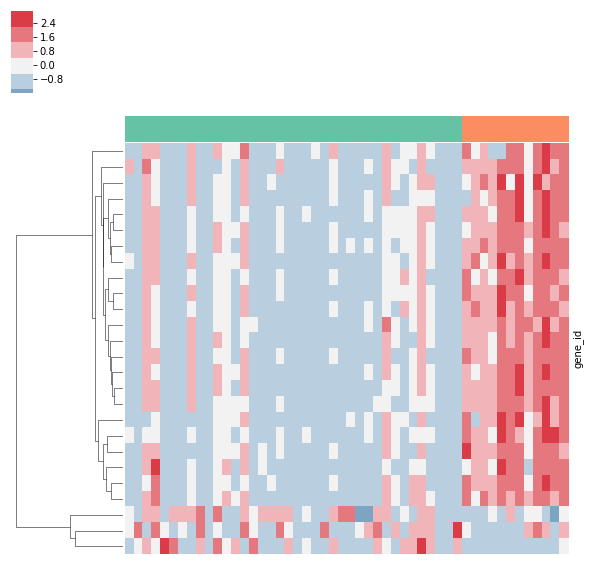

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

col_order = assign.sort_values(1).index.values
cmap = sns.color_palette("Set2", max(assign[1].values))
col_colors = [cmap[x - 1] for x in assign.sort_values(1)[1].values]

g = sns.clustermap(exp.reindex(en.get_enriched_term_genes()).reindex(col_order, axis=1),
                   col_cluster=False,
                   col_colors=col_colors,
                   z_score=0,
                   method='ward',
                   center=0,
                   cmap=sns.diverging_palette(240, 10, n=7),
                   figsize=(10, 10))

ax = g.ax_heatmap

ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])

pth = '../img/expression-heatmap.svg'
plt.savefig(pth, format='svg', bbox_inches='tight')

pth = '../img/expression-heatmap.png'
plt.savefig(pth, format='png', bbox_inches='tight')